<a href="https://colab.research.google.com/github/Ankit-LASA/Data-Science/blob/main/Unit7/Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-z5_l5o0b
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-z5_l5o0b
  Resolved https://github.com/pydata/xarray.git to commit 0caf09628011f9790d6e8df62fe92c485c7382ae
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev17+g0caf0962-py3-none-any.whl size=1260150 sha256=9a3926bde410c2c76ea5170d1a8db12723d6dcf770382e6ff65fe9ed64ecedb7
  Stored in directory: /tmp/pip-ephem-wheel-cache-52wzt557/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.7 MB/s eta 0:00:00
   ━

In [2]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

Many people opt to choose polynomial elements in their models to fit a more complicated dataset with a more intricate pattern. In certain instances, simpler models fail to account for the data, so a polynomial can better model data. The benefit is that it can provide an accurate reading of complex data in modelling.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

In certain instances, you wouldn't want to include a polynomial element because a one-dimensional dataset would be sufficient to account for the data. In these cases, a polynomial dataset can actually overfit to the data and predict poorly. Instead, a simpler model may be better because it's simpler to analyze, runs quicker, and avoids overfitting.

**Task3**:

What's the point of using b splines?

The point of using b splines is to garner to accuracy of polynomial regressions without the threat of overfitting data. By splitting a model into piecewise sections through knots, the model is less strict and far more flexible, allowing to better fit a curve to data and cushioning the effects of overfitting the data.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

It's a b-spline run on each data point itself rather than ranges of a dataset to discover the number and the location of knots automatically. By applying and testing the relationships between data points, it fits for the data accurately.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [6]:
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv').dropna()
howell

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
...,...,...,...,...
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062497,21.0,0
542,71.120,8.051258,0.0,1


In [11]:
#we need to specify the two distribution's relationships with a bambi method
formula_howell = bmb.Formula(
    "weight ~ poly(height, degree=3)",
    "sigma ~ height"
)

In [13]:
model_poly_1 = bmb.Model(formula_howell, howell)
idata_poly_1 = model_poly_1.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


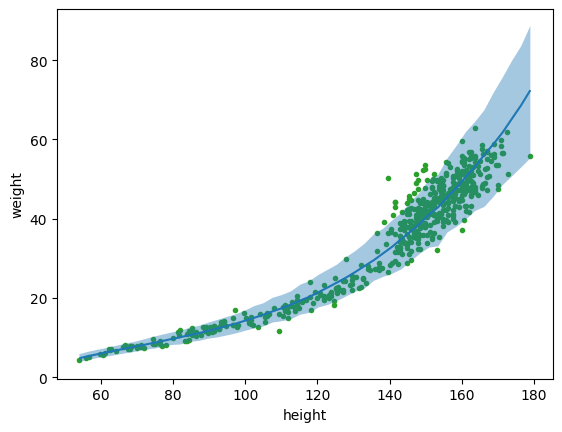

In [14]:
bmb.interpret.plot_predictions(model_poly_1, idata_poly_1, "height", pps=True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

If you don't specify a mean function, you assume the GP centers around zero too as you forecast into the future.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

My favorite graph was the final predictor graph with time (in centuries) as the x axis and CO2 (in ppm) as the y axis. I chose it because unlike the other graphs, it's simple, easy to understand, and decipherable. The projected lines demonstrate potential CO2 amounts into the future, showing a model with potential utility in the real world. By combining the gaussian modelling, the author was able to predict future carbon emissions.